In [1]:
#%% import and load data
import os
import sys

sys.path.append('..')
# %matplotlib inline
import medicc

In [2]:
%matplotlib inline

In [3]:
data_folder = "../examples"

# Load the output copy-numbers and the final trees
ptx011_df = medicc.io.read_and_parse_input_data(os.path.join(data_folder, 'output_gundem_et_al_2015/PTX011_final_cn_profiles.tsv'))
ptx011_tree = medicc.io.import_tree(os.path.join(data_folder, 'output_gundem_et_al_2015/PTX011_final_tree.new'), 'diploid')

# Plotting

## Plotting just the tree

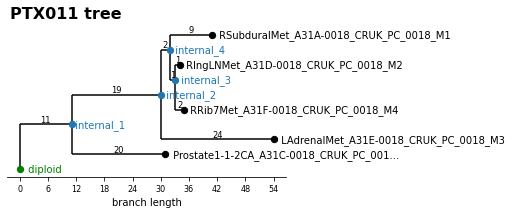

In [4]:
fig = medicc.plot.plot_tree(ptx011_tree,
							title='PTX011 tree',
							show_branch_lengths=True,
							
							# only valid after performing bootstrapping
							show_branch_support=False,

							# the following parameters are unchanged from the default
							label_func=None,
							ax=None,
							output_name=None,
							normal_name='diploid',
							width_scale=1,
							height_scale=1,
							show_events=False,
							branch_labels=None,
							label_colors=None,
							hide_internal_nodes=False,
							marker_size=None,
							line_width=None,
							)

# fig.savefig(os.path.join(data_folder, 'output/PTX011_tree.pdf'), bbox_inches='tight')


## Plotting the tree next to the copy-number profiles with medicc.plot.plot_cn_profiles

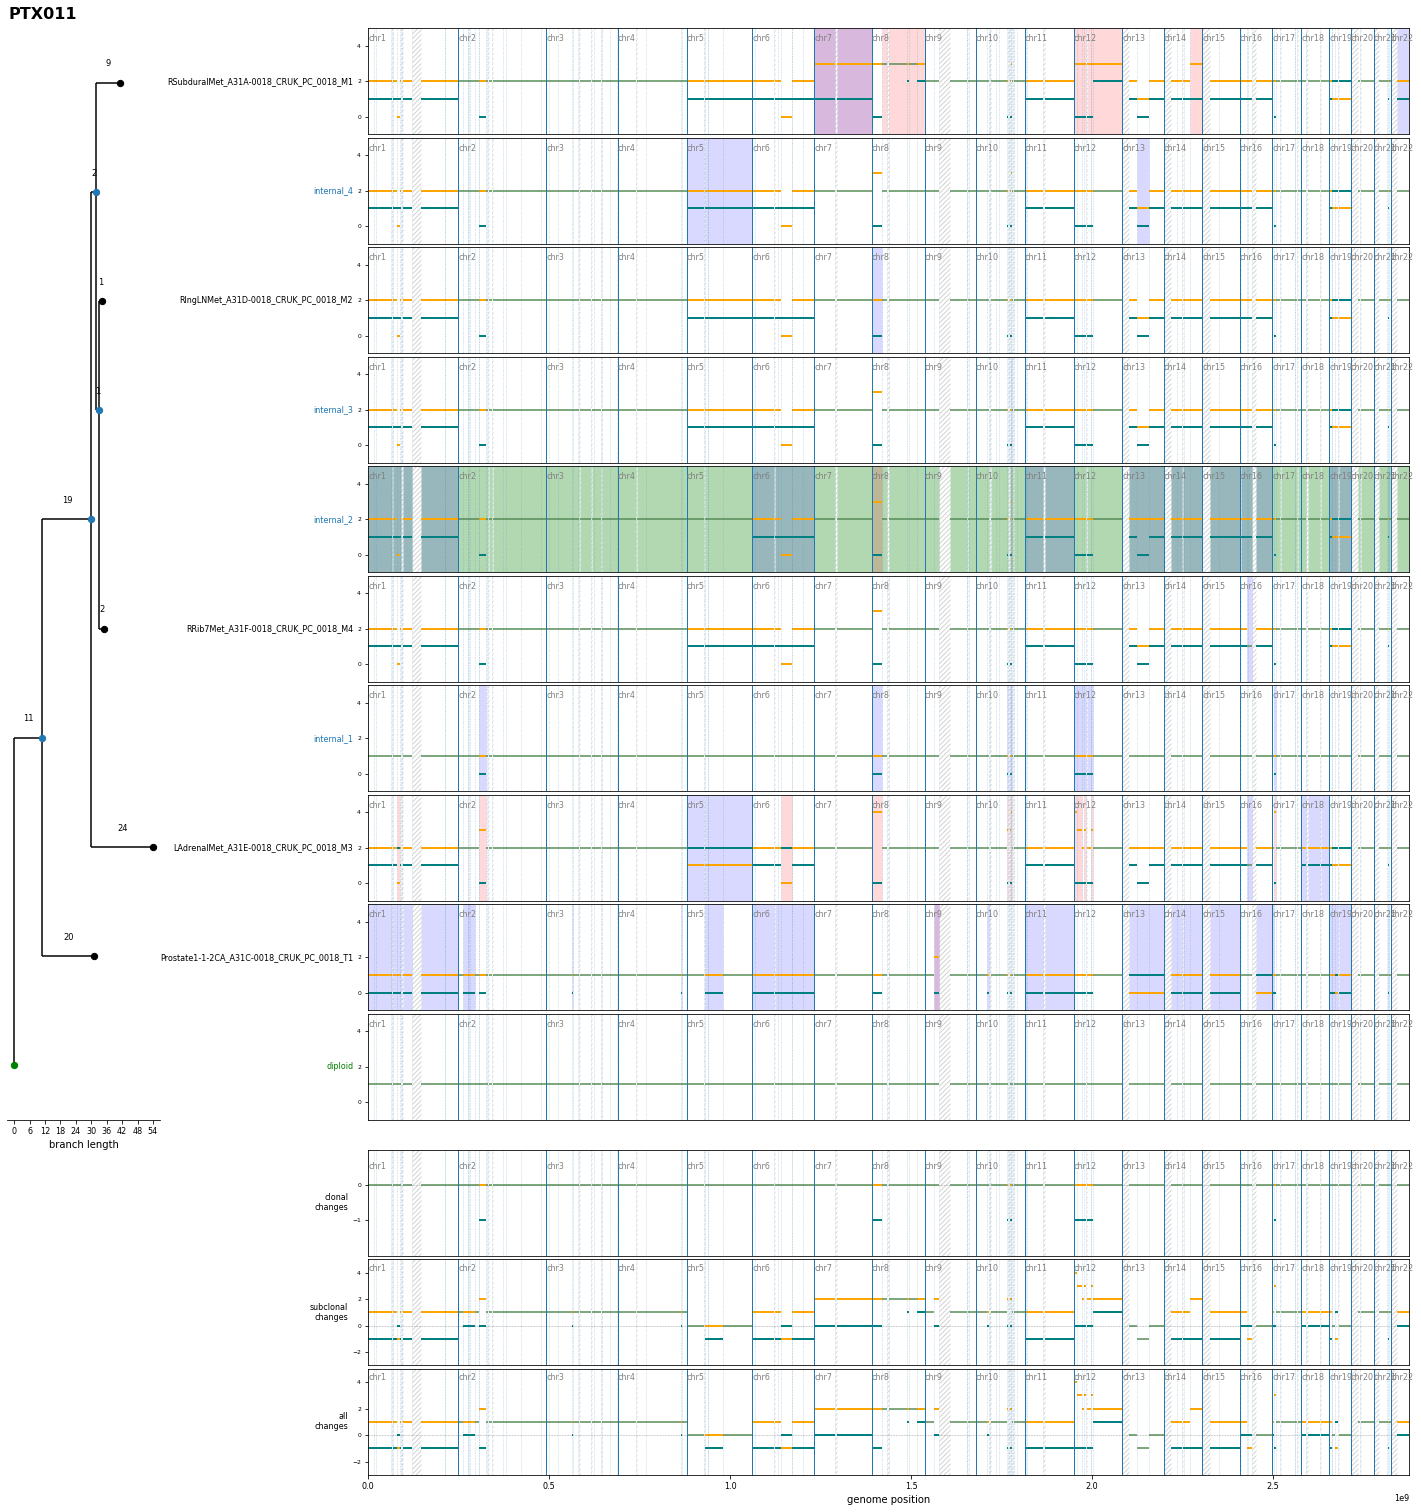

In [5]:
# First we want to rename chromosomes from "chr1" to "1", etc.
plotdat = ptx011_df.reset_index()
plotdat['chrom'] = plotdat.chrom.str.replace('chr','')
plotdat.set_index(['sample_id', 'chrom', 'start', 'end'], inplace=True)

# Next we want to rescale the final output
tree_width_scale = 1
track_width_scale = 0.6
height_scale = 2

fig = medicc.plot.plot_cn_profiles(
	ptx011_df,
	ptx011_tree, 
	title='PTX011', 
	normal_name='diploid', 
	tree_width_scale=tree_width_scale,
	track_width_scale=track_width_scale,
	height_scale=height_scale,
	hide_normal_chromosomes=True,
	plot_clonal_summary=True,
	ignore_segment_lengths=False,
	
	# the following parameters are unchanged from the default
	label_func=None,
	mincn='auto',
	maxcn='auto',
	allele_columns=['cn_a', 'cn_b'],
	plot_summary=True,
	plot_subclonal_summary=True,
	horizontal_margin_adjustment=0,
	close_gaps=False,
	show_small_segments=False,
	show_branch_support=False,
	hide_internal_nodes=False,
	chr_label_func=None,
	show_events_in_tree=False,
	show_events_in_cn=True,
	show_branch_lengths=True,
	detailed_xticks=False,
	clonal_transparant=False,	
	)

# fig.savefig(os.path.join(data_folder, 'output/PTX011_cn_profiles.pdf'), bbox_inches='tight')

## Plot CN heatmap

The alternative way to display the copy-number profiles is with the plot_cn_heatmap function
This is especially suitable for datasets with many samples (e.g. single-cell data)

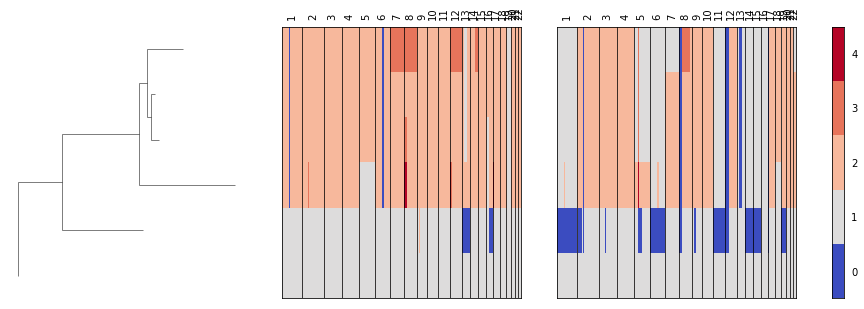

In [6]:
fig = medicc.plot.plot_cn_heatmap(
        input_df=ptx011_df, 
        final_tree=ptx011_tree,
        alleles=['cn_a', 'cn_b'],
		figsize=(15, 5),

		# the following parameters are unchanged from the default
		y_posns=None,
		cmax=8,
		total_copy_numbers=False,
		tree_width_ratio=1,
		cbar_width_ratio=0.05,
		tree_line_width=0.5,
		tree_marker_size=0,
		tree_label_colors=None,
		tree_label_func=None,
		ignore_segment_lengths=False,
		title='',
		cmap='coolwarm'
		)

# fig.savefig(os.path.join(data_folder, 'output/PTX011_cn_profiles_heatmap.pdf'), bbox_inches='tight')

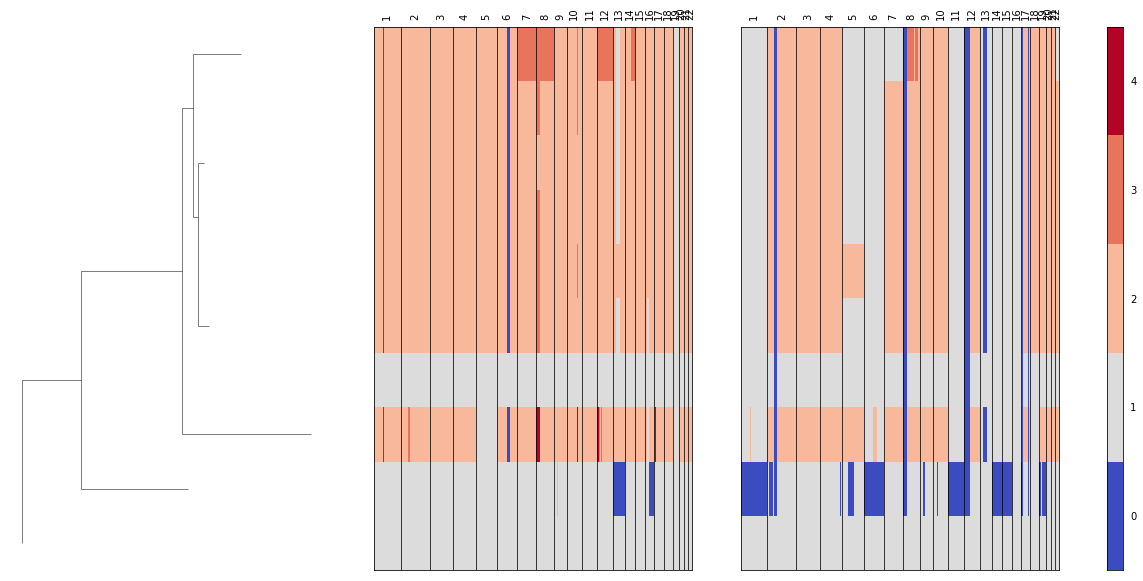

In [7]:
# By setting show_internal_nodes=True, the internal nodes are also included

fig = medicc.plot.plot_cn_heatmap(
        input_df=ptx011_df, 
        final_tree=ptx011_tree,
        alleles=['cn_a', 'cn_b'],
		show_internal_nodes=True
		)

# fig.savefig(os.path.join(data_folder, 'output/PTX011_cn_profiles_heatmap_with_internal_nodes.pdf'), bbox_inches='tight')